In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

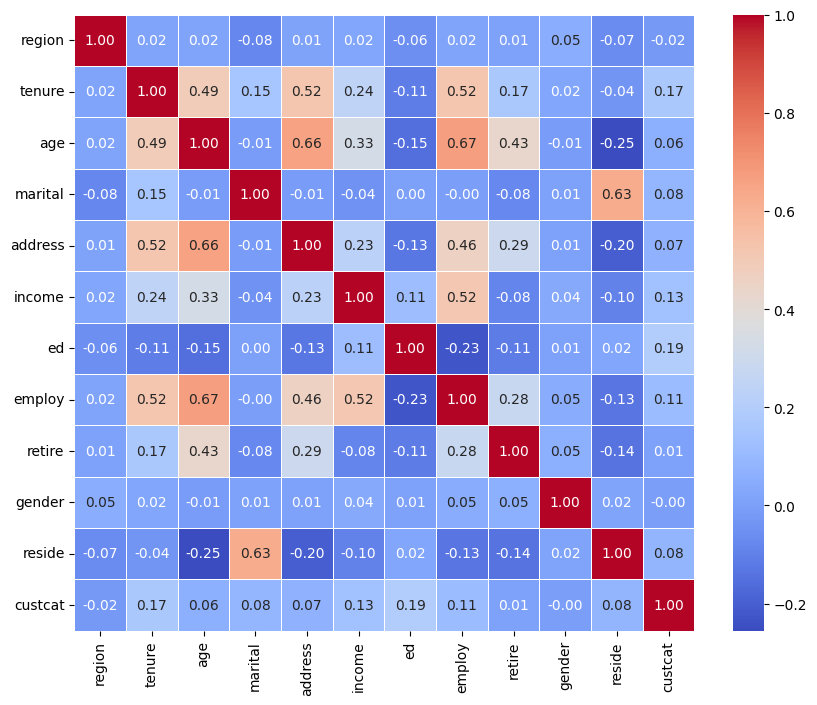

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [5]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [20]:
X = df.drop(['custcat', 'retire', 'gender', 'age', 'address', 'reside', 'marital'],axis=1)
y = df['custcat']

In [21]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

for k in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_classifier.fit(X_train,y_train)
    yhat = knn_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, yhat))
    print(f'{k}: ', accuracy_score(y_test, yhat))


1:  0.34
2:  0.36
3:  0.295
4:  0.335
5:  0.315
6:  0.315
7:  0.365
8:  0.385
9:  0.385
10:  0.365
11:  0.37
12:  0.4
13:  0.4
14:  0.4
15:  0.38
16:  0.38
17:  0.395
18:  0.4
19:  0.375


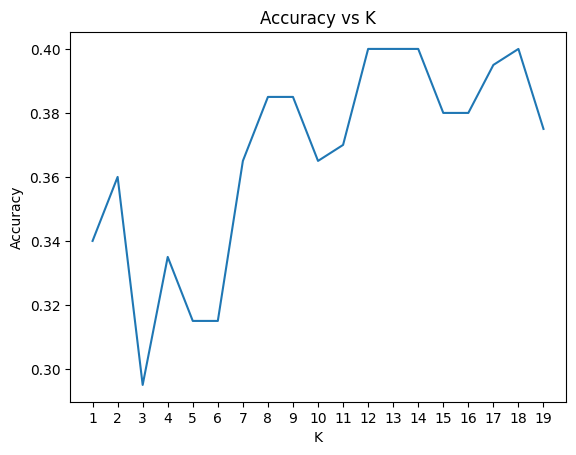

0.4


In [28]:
plt.plot(range(1,20), accuracy_scores)
plt.xticks(range(1,20))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

print(max(accuracy_scores))